In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Abrindo o CSV

In [106]:
df = pd.read_csv("/home/jayron/Desktop/despesas_senado/despesa_ceaps_2022.csv",encoding="ISO-8859-1", sep = ';', skiprows=1)

## Fazendo retirando virgulas do campo VALOR_REEMBOLSO e fazendo o parse para float

In [107]:
def format_value(value):
    return float(value.replace('.', '').replace(',', '.'))

# Aplicar a função format_value à coluna 'VALOR_REEMBOLSADO'
df['VALOR_REEMBOLSADO'] = df['VALOR_REEMBOLSADO'].apply(format_value)

In [ ]:
# Aplica a moeda local, mas deixa inutilizavel para operações matematica

"""
# Definir o formato de localização para o Brasil
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

# Função para formatar o valor
def format_value(valor):
    return locale.currency(valor, grouping=True)

# Aplicar a formatação apenas na coluna 'VALOR_REEMBOLSO'
df['VALOR_REEMBOLSADO'] = df['VALOR_REEMBOLSADO'].apply(format_value)
"""

"\n# Definir o formato de localização para o Brasil\nlocale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')\n\n# Função para formatar o valor\ndef format_value(valor):\n    return locale.currency(valor, grouping=True)\n\n# Aplicar a formatação apenas na coluna 'VALOR_REEMBOLSO'\ndf['VALOR_REEMBOLSADO'] = df['VALOR_REEMBOLSADO'].apply(format_value)\n"

## Convertendo a data

In [102]:
df['DATA'] = pd.to_datetime(df['DATA'], format="%d/%m/%Y")

### NOME DO SENADOR, DESPESA E MAIOR VALOR GASTO POR DESPESA

In [108]:
maiores_gastos_por_despesa = df.groupby("TIPO_DESPESA").apply(lambda x: x.loc[x["VALOR_REEMBOLSADO"].idxmax()]).reset_index(drop=True)
maiores_gastos_por_despesa[["SENADOR", "TIPO_DESPESA", "VALOR_REEMBOLSADO"]]

,SENADOR,TIPO_DESPESA,VALOR_REEMBOLSADO
0,CHIQUINHO FEITOSA,"Aluguel de imóveis para escritório político, c...",15000.00
1,CID GOMES,Aquisição de material de consumo para uso no e...,10000.00
2,SÉRGIO PETECÃO,"Contratação de consultorias, assessorias, pesq...",77012.00
3,STYVENSON VALENTIM,Divulgação da atividade parlamentar,72923.16
4,ELIANE NOGUEIRA,"Locomoção, hospedagem, alimentação, combustíve...",20011.00
5,OMAR AZIZ,"Passagens aéreas, aquáticas e terrestres nacio...",10871.78
6,RANDOLFE RODRIGUES,Serviços de Segurança Privada,1090.00


## Plot dos 5 maiores gastos únicos por senador

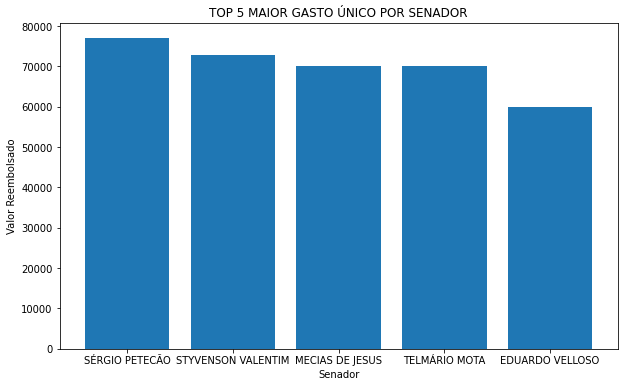

In [109]:
# Agrupar por senador e obter o valor máximo de reembolso
max_reimbursement = df.groupby(['SENADOR'])["VALOR_REEMBOLSADO"].max()

# Ordenar em ordem decrescente e selecionar os 5 maiores
top_5_senators = max_reimbursement.nlargest(5)

# Criar um dataframe apenas com os dados dos 5 maiores senadores
df_top_5 = pd.DataFrame({'SENADOR': top_5_senators.index, 'VALOR_REEMBOLSADO': top_5_senators.values})

# Aumentar o tamanho da figura
plt.figure(figsize=(10, 6))

# Criar o gráfico de barras
plt.bar(df_top_5['SENADOR'], df_top_5['VALOR_REEMBOLSADO'])

# Definir os rótulos dos eixos
plt.xlabel('Senador')
plt.ylabel('Valor Reembolsado')

# Título do gráfico
plt.title('TOP 5 MAIOR GASTO ÚNICO POR SENADOR')

# Exibir o gráfico
plt.show()

## TOP 5 MAIORES GASTOS ÚNICOS POR NOME DO SENADOR, TIPO DA DESPESA E O MAIOR VALOR GASTO

In [110]:
# Agrupar por "SENADOR" e "TIPO_DESPESA" e obter os maiores valores de "VALOR_REEMBOLSADO"
grouped = df.groupby(['SENADOR', 'TIPO_DESPESA'])['VALOR_REEMBOLSADO'].max()

# Obter os 5 maiores valores de "VALOR_REEMBOLSADO"
top_5 = pd.DataFrame(grouped.nlargest(6))

# Exibir o resultado
dataframe = pd.DataFrame(top_5["VALOR_REEMBOLSADO"]).reset_index()

dataframe

,SENADOR,TIPO_DESPESA,VALOR_REEMBOLSADO
0,SÉRGIO PETECÃO,"Contratação de consultorias, assessorias, pesq...",77012.00
1,STYVENSON VALENTIM,Divulgação da atividade parlamentar,72923.16
2,MECIAS DE JESUS,Divulgação da atividade parlamentar,70000.00
3,TELMÁRIO MOTA,Divulgação da atividade parlamentar,70000.00
4,EDUARDO VELLOSO,"Contratação de consultorias, assessorias, pesq...",60000.00
5,STYVENSON VALENTIM,"Contratação de consultorias, assessorias, pesq...",60000.00
